<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/Lab_work_4/rezult_3_Turtledove_Harry__Aftershocks/Gadilshina_3_DB_MapReduce_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с данными студента**

In [220]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [221]:
# проверка каталога
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [223]:
#удаление дубликатов
!rm 100.txt

In [224]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 100.txt to 100.txt


In [225]:
#объединение  текстов студента в один массив данных

first = True
with open('stud3.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(100, 101)]) #
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

filename = 'stud3.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)

text_lower2=text_lower.split(' ')
text_lower2

Выходные данные были обрезаны до нескольких последних строк (5000).
 “Well, okay,” Auerbach said with a sigh. “But I’ll tell you something: there aren’t a hell of a lot of places left where we can go without somebody wanting to take a shot at us as soon as we get there. That gets old, you know what I mean?”
 “Things ought to be pretty peaceful for the layover here.” Penny sighed, too. Rance knew what that meant. Whenever she came to someplace peaceful, she got bored. When she got bored, she started turning things on their ear. He’d had enough of things’ getting turned on their ear. Telling her so wouldn’t do him any good. He knew as much. He didn’t think she started stirring things up on purpose-which didn’t mean they didn’t get stirred up.
 Groundcrew men wheeled a deplaning ladder up to the airliner’s front door. Rance grunted even more painfully than usual as he heaved himself upright. Except for a couple of trips back to the head, he’d been trapped in a none-too-spacious seat ever 

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'aftershocks',
 'авторы',
 'turtledove',
 'harry',
 '',
 '',
 'жанр',
 'фэнтези',
 'адрес',
 'книги',
 '',
 '',
 'аннотация',
 'the',
 'nuclear',
 'war',
 'between',
 'nazi',
 'germany',
 'and',
 'the',
 'race',
 'ends',
 'with',
 'a',
 'germany',
 'surrender',
 'after',
 'ernst',
 'kaltenbrunner',
 'the',
 'fuhrer',
 'is',
 'killed',
 'and',
 'replaced',
 'by',
 'walter',
 'dornberger',
 '',
 'dornberger',
 'agrees',
 'to',
 'disband',
 'the',
 'axis',
 'forces',
 'withdraw',
 'german',
 'troops',
 'from',
 'occupied',
 'france',
 'and',
 'disband',
 'the',
 'german',
 'rocket',
 'and',
 'nuclear',
 'forces',
 '',
 'the',
 'german',
 'withdrawal',
 'results',
 'in',
 'instability',
 'in',
 'the',
 'governments',
 'of',
 'its',
 'allies',
 'such',
 'as',
 'the',
 'british',
 'union',
 'of',
 'fascists',
 'in',
 'britain',
 'as',
 'well',
 'as',
 'clashes',
 'between',
 'the',
 'free',
 'french',
 'fo

In [228]:
len(text_lower2)

262357

In [229]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]

dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'aftershocks',
 'авторы',
 'turtledove',
 'harry',
 'жанр',
 'фэнтези',
 'адрес',
 'книги',
 'аннотация',
 'the',
 'nuclear',
 'war',
 'between',
 'nazi',
 'germany',
 'and',
 'the',
 'race',
 'ends',
 'with',
 'a',
 'germany',
 'surrender',
 'after',
 'ernst',
 'kaltenbrunner',
 'the',
 'fuhrer',
 'is',
 'killed',
 'and',
 'replaced',
 'by',
 'walter',
 'dornberger',
 'dornberger',
 'agrees',
 'to',
 'disband',
 'the',
 'axis',
 'forces',
 'withdraw',
 'german',
 'troops',
 'from',
 'occupied',
 'france',
 'and',
 'disband',
 'the',
 'german',
 'rocket',
 'and',
 'nuclear',
 'forces',
 'the',
 'german',
 'withdrawal',
 'results',
 'in',
 'instability',
 'in',
 'the',
 'governments',
 'of',
 'its',
 'allies',
 'such',
 'as',
 'the',
 'british',
 'union',
 'of',
 'fascists',
 'in',
 'britain',
 'as',
 'well',
 'as',
 'clashes',
 'between',
 'the',
 'free',
 'french',
 'forces',
 'and',
 'the',
 'new',
 'government',

In [230]:
from google.colab import files
with pd.ExcelWriter('allstudentWords_3.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud3')
files.download('allstudentWords_3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [231]:
!pip install pymorphy2

In [232]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'aftershocks',
 'автор',
 'turtledove',
 'harry',
 'жанр',
 'фэнтези',
 'адрес',
 'книга',
 'аннотация',
 'the',
 'nuclear',
 'war',
 'between',
 'nazi',
 'germany',
 'and',
 'the',
 'race',
 'ends',
 'with',
 'a',
 'germany',
 'surrender',
 'after',
 'ernst',
 'kaltenbrunner',
 'the',
 'fuhrer',
 'is',
 'killed',
 'and',
 'replaced',
 'by',
 'walter',
 'dornberger',
 'dornberger',
 'agrees',
 'to',
 'disband',
 'the',
 'axis',
 'forces',
 'withdraw',
 'german',
 'troops',
 'from',
 'occupied',
 'france',
 'and',
 'disband',
 'the',
 'german',
 'rocket',
 'and',
 'nuclear',
 'forces',
 'the',
 'german',
 'withdrawal',
 'results',
 'in',
 'instability',
 'in',
 'the',
 'governments',
 'of',
 'its',
 'allies',
 'such',
 'as',
 'the',
 'british',
 'union',
 'of',
 'fascists',
 'in',
 'britain',
 'as',
 'well',
 'as',
 'clashes',
 'between',
 'the',
 'free',
 'french',
 'forces',
 'and',
 'the',
 'new',
 'government',


In [233]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [234]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [235]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [236]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('aftershocks', 1), ('автор', 1), ('turtledove', 1), ('harry', 1), ('жанр', 1), ('фэнтези', 1), ('адрес', 1), ('книга', 1), ('аннотация', 1), ('the', 1), ('nuclear', 1), ('war', 1), ('between', 1), ('nazi', 1), ('germany', 1), ('and', 1), ('the', 1), ('race', 1), ('ends', 1), ('with', 1), ('germany', 1), ('surrender', 1), ('after', 1), ('ernst', 1), ('kaltenbrunner', 1), ('the', 1), ('fuhrer', 1), ('killed', 1), ('and', 1), ('replaced', 1), ('walter', 1), ('dornberger', 1), ('dornberger', 1), ('agrees', 1), ('disband', 1), ('the', 1), ('axis', 1), ('forces', 1), ('withdraw', 1), ('german', 1), ('troops', 1), ('from', 1), ('occupied', 1), ('france', 1), ('and', 1), ('disband', 1), ('the', 1), ('german', 1), ('rocket', 1), ('and', 1), ('nuclear', 1), ('forces', 1), ('the', 1), ('german', 1), ('withdrawal', 1), ('results', 1), ('instability', 1), ('the', 1), ('governments', 1), ('its', 1), ('allies', 1), 

In [237]:
print(list2)

[('nounced', 1), ('the', 1), ('alien', 1), ('name', 1), ('with', 1), ('care', 1), ('one', 1), ('syllable', 1), ('time', 1), ('lived', 1), ('and', 1), ('wrote', 1), ('about', 1), ('nine', 1), ('hundred', 1), ('years', 1), ('ago', 1), ('nine', 1), ('hundred', 1), ('our', 1), ('years', 1), ('should', 1), ('sayhalf', 1), ('many', 1), ('tosev', 1), ('came', 1), ('after', 1), ('our', 1), ('probe', 1), ('then', 1), ('atvar', 1), ('said', 1), ('and', 1), ('pshing', 1), ('made', 1), ('the', 1), ('affirmative', 1), ('gesture', 1), ('the', 1), ('race', 1), ('had', 1), ('studied', 1), ('tosev', 1), ('sixteen', 1), ('hundred', 1), ('years', 1), ('before', 1), ('again', 1), ('half', 1), ('that', 1), ('many', 1), ('tosevite', 1), ('terms', 1), ('the', 1), ('fleetlord', 1), ('went', 1), ('remember', 1), ('the', 1), ('swordswinging', 1), ('savage', 1), ('mounted', 1), ('animal', 1), ('the', 1), ('probe', 1), ('showed', 1), ('was', 1), ('the', 1), ('height', 1), ('tosevite', 1), ('military', 1), ('techn

Merging the two lists

In [238]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [239]:
final_list.sort()

In [240]:
len(final_list)

187986

In [241]:
final_list[0]

('aback', 1)

In [242]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [244]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [245]:
len(map1)

187985

In [246]:
len(map2)

0

In [247]:
print(map1)

[('aback', 1), ('abandoned', 1), ('abandoned', 1), ('abandoned', 1), ('abashed', 1), ('abashed', 1), ('aberration', 1), ('abiding', 1), ('abilities', 1), ('ability', 1), ('ability', 1), ('ability', 1), ('ability', 1), ('ability', 1), ('ability', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 

In [248]:
print(map2)

[]


# Reducer

Defining the reducer function

In [249]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [250]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [251]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [252]:
list3 = reduce1(map1)

Reducing the second n-z list

In [253]:
list4 = reduce2(map2)

Merging the two reduced lists

In [254]:
answer_list = list3 + list4
print(answer_list)

[('aback', 1), ('abandoned', 3), ('abashed', 2), ('aberration', 1), ('abiding', 1), ('abilities', 1), ('ability', 6), ('able', 113), ('aboard', 36), ('abominable', 1), ('abortions', 1), ('abortive', 1), ('about', 709), ('aboutand', 1), ('aboutnot', 1), ('aboutturn', 1), ('above', 21), ('abovethe', 1), ('abraham', 1), ('abridged', 1), ('abruptly', 2), ('abscess', 1), ('absconded', 1), ('absence', 3), ('absent', 1), ('absently', 2), ('absentmindedness', 1), ('absolute', 2), ('absolutely', 1), ('absolution', 1), ('abstract', 2), ('abstracted', 1), ('absurd', 6), ('absurdly', 2), ('abundance', 1), ('abundantly', 1), ('academic', 3), ('accelerated', 1), ('acceleration', 5), ('accent', 18), ('accented', 1), ('accept', 14), ('acceptable', 2), ('acceptably', 1), ('acceptance', 4), ('accepted', 7), ('accepting', 5), ('access', 6), ('accessible', 1), ('accident', 10), ('accidentexcept', 1), ('accidents', 1), ('accommodate', 3), ('accommodating', 1), ('accompanied', 3), ('accompanying', 1), ('acc

# Final Dataframe

In [255]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

Word  Frequency
0            aback          1
1        abandoned          3
2          abashed          2
3       aberration          1
4          abiding          1
...            ...        ...
12560         жанр          1
12561        книга          2
12562     название          1
12563      фэнтези          1
12564  электронный          1

[12565 rows x 2 columns]

In [256]:
print(df.to_string())

                            Word  Frequency
0                          aback          1
1                      abandoned          3
2                        abashed          2
3                     aberration          1
4                        abiding          1
5                      abilities          1
6                        ability          6
7                           able        113
8                         aboard         36
9                     abominable          1
10                     abortions          1
11                      abortive          1
12                         about        709
13                      aboutand          1
14                      aboutnot          1
15                     aboutturn          1
16                         above         21
17                      abovethe          1
18                       abraham          1
19                      abridged          1
20                      abruptly          2
21                       abscess

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       12565 non-null  object
 1   Frequency  12565 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 196.5+ KB


In [258]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

Word  Frequency
11083            the      11787
399              and       3995
12510            you       3482
11069           that       3166
9366            said       2402
...              ...        ...
5709   inspirational          1
5707      inspectors          1
5704      insolently          1
5703        insolent          1
12564    электронный          1

[12565 rows x 2 columns]

# EN

In [259]:
!rm stop-words_en.xlsx

In [260]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [261]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [262]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_101'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

Unnamed: 0    179
stop_en       179
dtype: int64
      WordStudent_101  Frequency
0                said       2402
1               would       1368
2                 one        852
3               could        778
4               didnt        712
...               ...        ...
12443         decides          1
12444         defying          1
12445         degrees          1
12446           deign          1
12447     электронный          1

[12448 rows x 2 columns]
WordStudent_101    12448
Frequency          12448
dtype: int64


# RU

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df_stop= pd.read_excel("stop-words-ru+.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

In [ ]:
df_student=df_student_clear2
df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
#df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

# PLOT

<ipython-input-263-cd2c26dcdc2b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_101'],rotation=75)


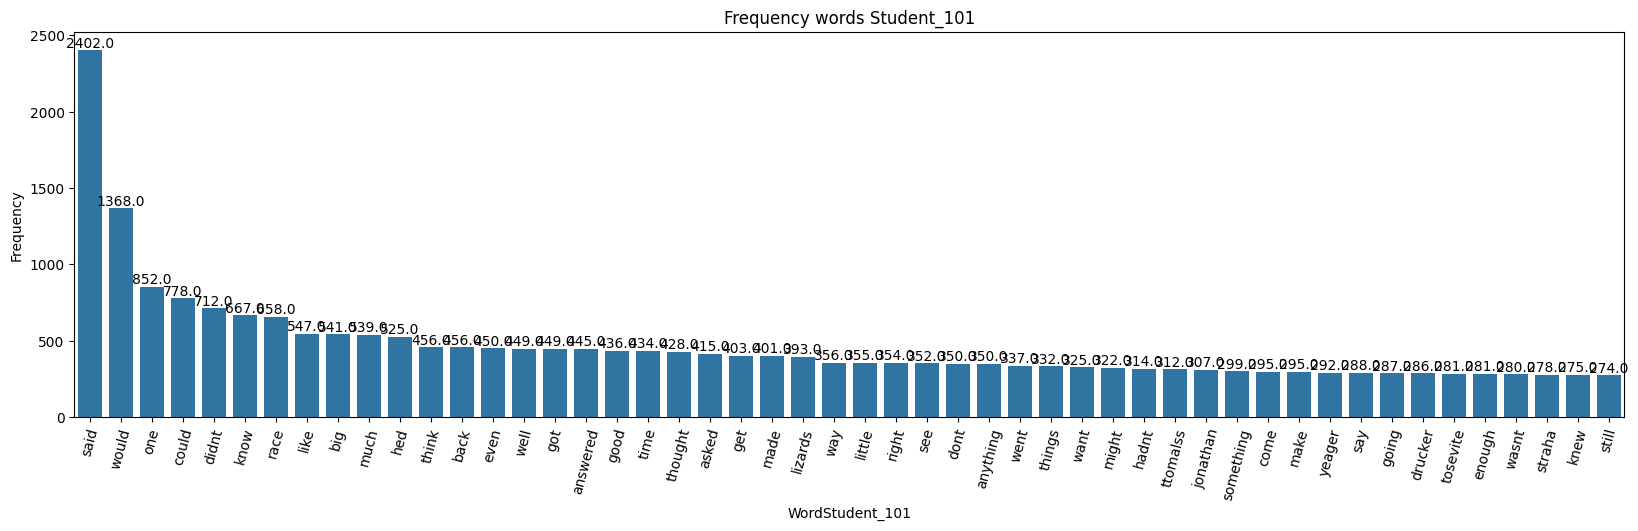

In [263]:
#Plotting the top 5 words by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_101',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_101'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_101")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [264]:
from google.colab import files
with pd.ExcelWriter('outputStudents_3.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_101')
files.download('outputStudents_3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [265]:
!ls

 100.txt		  outputStudents_1.xlsx		    rezult_1.xlsx	 stud2.txt
 90.txt			  outputStudents_2.xlsx		    rezult_2.xlsx	 stud3.txt
 allstudentWords_1.xlsx   outputStudents_3.xlsx		    rezult.xlsx		 stud.txt
 allstudentWords_2.xlsx  'outputTeacherW_Reduce (1).xlsx'   sample_data
 allstudentWords_3.xlsx  'outputTeacherW_Reduce (2).xlsx'   stop-words_en.xlsx
 allstudentWords.xlsx	  outputTeacherW_Reduce.xlsx	    stud1.txt


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [266]:
!rm Analise_Gadilshina_3.xlsx

rm: cannot remove 'Analise_Gadilshina_3.xlsx': No such file or directory


In [267]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce (3).xlsx


In [268]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
df_teach
print(df_teach.count())

Unnamed: 0      428
KorpusZakova    428
Frequency       428
dtype: int64


In [269]:
df_stud = pd.read_excel("outputStudents_3.xlsx", 'outputStudent_101')
#print(df_stud)
print(df_stud.count())

Unnamed: 0         12448
WordStudent_101    12448
Frequency          12448
dtype: int64


In [270]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_101.isin(df_teach.KorpusZakova)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_101':'WordSt_101Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_101'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_101Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

     Unnamed: 0 WordSt_101Tch  FrSt_101
0          1508          year        12
1         10913       wrought         1
2          1532       written        12
3          1197       writing        16
4          1553         write        12
..          ...           ...       ...
300        2821      activity         5
301        7485    activities         1
302        4076  accomplished         3
303        4060      academic         3
304         182          able       113

[305 rows x 3 columns]
Unnamed: 0       305
WordSt_101Tch    305
FrSt_101         305
dtype: int64


In [271]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusZakova.isin(df_stud.WordStudent_101)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusZakova':'WordSt_101Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_101Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

     Unnamed: 0 WordSt_101Tch  FrTch
0           101          year      2
1           322       wrought      1
2           103       written      2
3            92       writing      2
4             9         write      9
..          ...           ...    ...
300          25      activity      4
301          59    activities      3
302         204  accomplished      1
303         179      academic      1
304          86          able      2

[305 rows x 3 columns]
Unnamed: 0       305
WordSt_101Tch    305
FrTch            305
dtype: int64


In [272]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

WordSt_101Tch  FrTch
0        students     17
1          lesson     16
2            plan     13
3            main     13
4           notes     10
..            ...    ...
300          talk      1
301       reality      1
302        talent      1
303       reflect      1
304       highest      1

[305 rows x 2 columns]

In [273]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

WordSt_101Tch  FrSt_101
0             one       852
1           could       778
2            know       667
3            like       547
4            much       539
..            ...       ...
300       visible         1
301        define         1
302    definition         1
303     deception         1
304       develop         1

[305 rows x 2 columns]

In [274]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res.head(50)

WordSt_101Tch  FrTch  FrSt_101
0        students     17         2
1          lesson     16         5
2            plan     13         9
3            main     13        11
4           notes     10         7
5            time     10       434
6        learning      9        21
7           write      9        12
8          points      8         3
9           paper      6        14
10           look      6       172
11           show      6        69
12            use      6        98
13          class      6         3
14          check      6        11
15        student      6         2
16          begin      5        10
17           like      5       547
18     discussion      5         7
19          words      5        69
20           task      5         2
21      important      5        90
22       activity      4         5
23            one      4       852
24       sentence      4        16
25           want      4       325
26        heading      4        14
27        believe      4       116
28       practice      4        17
29         taking      4        35
30            ask      4        87
31           part      4       101
32         person      4        16
33        develop      4         1
34           take      4       193
35        lecture      4         1
36  understanding      4         8
37          point      4       107
38           body      3        56
39           word      3        90
40           neck      3        12
41          today      3        32
42            box      3         2
43     understand      3       163
44     underneath      3         1
45            new      3       124
46        whether      3        91
47           page      3         3
48            man      3       160
49     conclusion      3         5

In [275]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

WordSt_101Tch  FrSt_101  FrTch
0             one       852      4
1           could       778      3
2            know       667      2
3            like       547      5
4            much       539      2
..            ...       ...    ...
300       visible         1      1
301        define         1      2
302    definition         1      3
303     deception         1      1
304       develop         1      4

[305 rows x 3 columns]

In [276]:
from google.colab import files
with pd.ExcelWriter('rezult_3.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult_3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

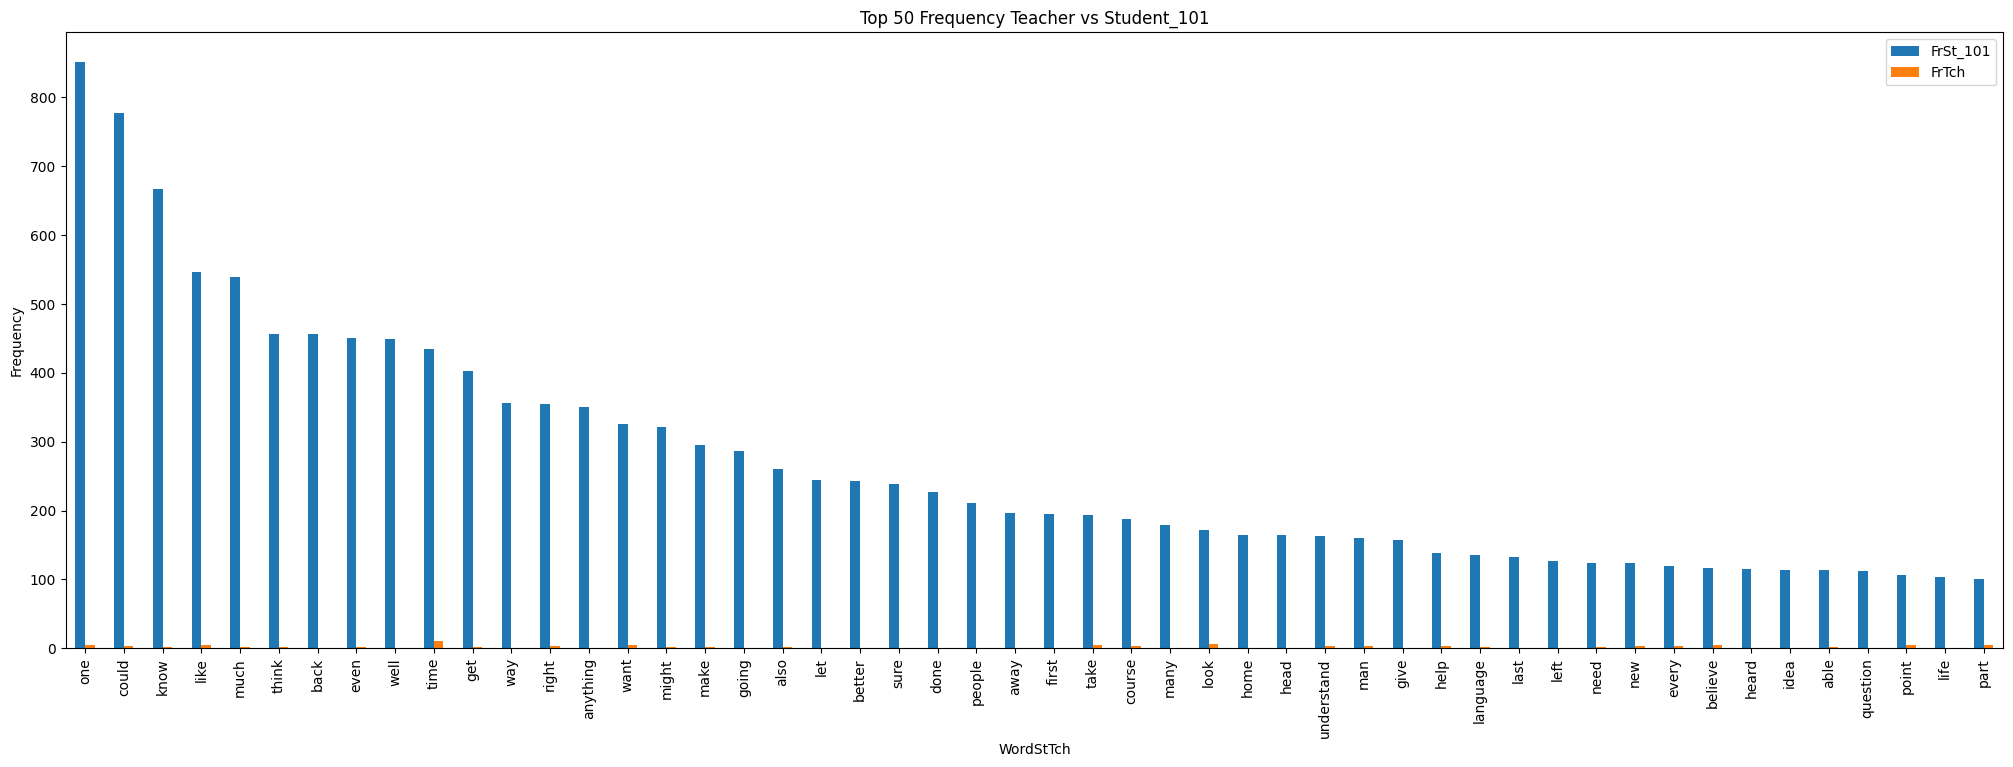

In [277]:
# Выбираем только первые 50 значений из столбца 'WordSt_101Tch'
x = res['WordSt_101Tch'].head(50).values.tolist()
res.head(50).plot(kind='bar', figsize=(25, 8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Top 50 Frequency Teacher vs Student_101")
plt.xticks(x_pos, x)
plt.show()

In [278]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

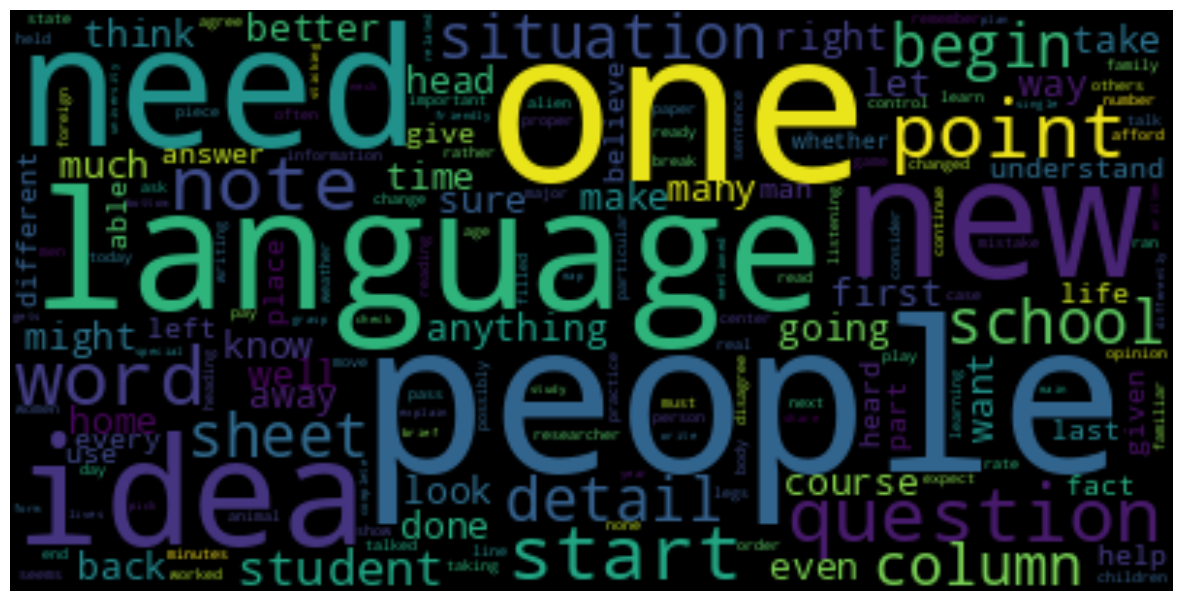

In [279]:
viz=res['WordSt_101Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")